# TP Machine Learning - Unupervised Learning

### Importation des packages

In [332]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Workflow de classification Scikit-Learn de bout en bout

### 1. Préparer les données :

In [333]:
heart_disease = pd.read_csv('/home/mohamed/Documents/TP1/heart-disease.csv')

#### Comme notre variable cible est une catégorie (maladie cardiaque ou non), il s'agit donc d'un problème de classification.

#### Créer de X et de y en fractionnant la dataframe :

In [334]:
X = heart_disease[[col for col in heart_disease.columns if col != 'target']]
y = heart_disease['target']

#### Diviser X et y en ensembles d'entraînement et de test

In [335]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [336]:
print("Shape of X_train : ", X_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of y_test : ", y_test.shape)

Shape of X_train :  (242, 13)
Shape of X_test :  (61, 13)
Shape of y_train :  (242,)
Shape of y_test :  (61,)


#### Après avoir suivi la carte, on a décidé d'utiliser le RandomForestClassifier

In [337]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)

### 3. Ajuster le modèle et faire des prédictions :

In [338]:
clf.fit(X_train, y_train)
y_preds = clf.predict([X_train.loc[0].values])
y_preds

array([1])

### 4. Évaluer les prédictions du modèle :

#### D'après la documentation de **sklearn**:
    score(X, y[, sample_weight]) : Return the mean accuracy on the given test data and labels.

In [339]:
# Evaluation sur les données d'entraînnement
clf.score(X_train, y_train)

0.8677685950413223

In [340]:
# Evaluation sur les données du test
clf.score(X_test, y_test)

0.8688524590163934

#### la méthode score renvoie une valeur d'accuracy qu'on peut juger bonne car elle dépasse 0.5 est est proche de 1.
#### la valeur relative aux données d'entraînnement a dépassé légèrement celle des données de test.

# Expérimenter différents modèles de classification

## Importation des modèles

In [341]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [342]:
models = {"LinearSVC" : LinearSVC(),
         "KNN" : KNeighborsClassifier(),
         "SVC" : SVC(),
         "LogisticRegression" : LogisticRegression(),
         "RandomForestClassifier" : RandomForestClassifier()}
results = {}

In [343]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)
results

/home/mohamed/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/mohamed/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LinearSVC': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'SVC': 0.7049180327868853,
 'LogisticRegression': 0.8852459016393442,
 'RandomForestClassifier': 0.8360655737704918}

#### - Le modèle qui a fonctionné le mieux est **LogisticRegression**
#### - L résultat change après chaque nouvelle exécution de la cellule car les modèles cherchent les modèles aléatoirement dans les données.
#### - En mettant numpy.random.seed à 42 par exemple, les valeurs ne seront plus changées.

In [344]:
np.random.seed(42)
for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)
results

/home/mohamed/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/mohamed/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LinearSVC': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'SVC': 0.7049180327868853,
 'LogisticRegression': 0.8852459016393442,
 'RandomForestClassifier': 0.8360655737704918}

In [345]:
result_df = pd.DataFrame(results.values(), index = results.keys(), columns = ['accuracy'])
result_df

,accuracy
LinearSVC,0.868852
KNN,0.688525
SVC,0.704918
LogisticRegression,0.885246
RandomForestClassifier,0.836066


<AxesSubplot:>

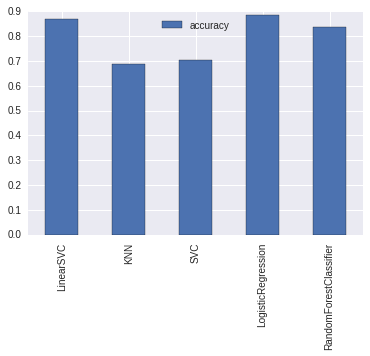

In [346]:
result_df.plot.bar()

# Hyperparameter Tuning

## LogisticRegression hyperparameters

In [347]:
log_reg_grid = {"C" : np.logspace(-4, 4, 20),
               "solver" : ["liblinear"]}

#### Puisque nous avons un ensemble d'hyperparamètres, nous pouvons importer RandomizedSearchCV, lui transmettre notre dictionnaire d'hyperparamètres et le laisser rechercher la meilleure combinaison.

In [348]:
np.random.seed(42)
from sklearn.model_selection import RandomizedSearchCV
rs_log_reg = RandomizedSearchCV(estimator = LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv = 5,
                               n_iter = 5)
srch = rs_log_reg.fit(X_train, y_train)

#### Une fois que RandomizedSearchCV a terminé, nous pouvons trouver les meilleurs hyperparmètres trouvés en utilisant les attributs best_params_.

In [349]:
srch.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [350]:
srch.score(X_test, y_test)

0.8852459016393442

#### - Après le réglage des hyperparamètres, le score du modèle est bien amélioré

# Évaluation du modèle de classificateur

#### Nous allons instancier une nouvelle instance de notre modèle en utilisant les meilleurs hyperparamètres trouvés par RandomizedSearchCV.

In [351]:
clf = LogisticRegression(solver='liblinear', C = 0.23357214690901212)

In [352]:
clf.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

#### Il s'agit maintenant d'importer les méthodes Scikit-Learn relatives pour chacune des métriques d'évaluation de classification que nous recherchons.

In [353]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

#### Faisons quelques prédictions sur les données de test en utilisant notre dernier modèle et sauvegardons-les dans y_preds.

In [354]:
y_pred = clf.predict([X_test.loc[i].values for i in X_test.index.values[:20]])

#### Il est temps d'utiliser les prédictions que notre modèle a trouvé pour l'évaluer

In [355]:
y_true = [y_test.loc[i] for i in y_test.index.values[:20]]
confusion_matrix(y_true, y_pred)

array([[ 8,  1],
       [ 1, 10]])

#### Que diriez-vous d'un rapport de classification ?

In [356]:
classification_report(y_true, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.89      0.89      0.89         9\n           1       0.91      0.91      0.91        11\n\n    accuracy                           0.90        20\n   macro avg       0.90      0.90      0.90        20\nweighted avg       0.90      0.90      0.90        20\n'

#### Le rapport de classification nous donne une plage de valeurs pour la précision, le rappel et le score F1, le temps de trouver ces métriques à l'aide des fonctions Scikit-Learn.

In [357]:
#precision score
precision_score(y_true, y_pred)

0.9090909090909091

In [358]:
#recall score
recall_score(y_true, y_pred)

0.9090909090909091

In [359]:
f1_score(y_true, y_pred)

0.9090909090909091

#### Scikit-Learn fournit une fonction pratique pour créer les deux, appelée plot_roc_curve ().

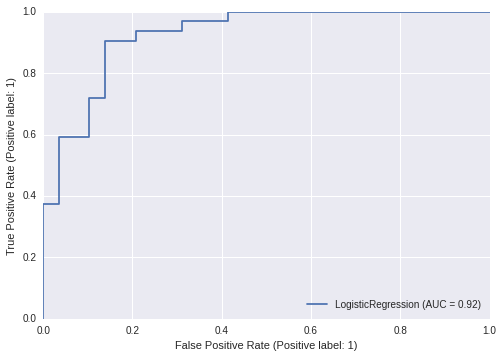

In [360]:
plt.style.use('seaborn')
plot_roc_curve(clf, X_test, y_test)

#### Nous pouvons calculer diverses métriques d'évaluation en utilisant la validation croisée en utilisant la fonction cross_val_score () de Scikit-Learn avec le paramètre de score.

In [361]:
from sklearn.model_selection import cross_val_score

In [362]:
t = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
t

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [363]:
t.mean()

0.8479781420765027

#### Il est maintenant temps de trouver la même chose pour la précision, le rappel et le score F1

In [364]:
np.mean(cross_val_score(clf, X, y, scoring='precision', cv=5))

0.8215873015873015

In [365]:
np.mean(cross_val_score(clf, X, y, scoring='f1', cv=5))

0.8705403543192143

In [366]:
np.mean(cross_val_score(clf, X, y, scoring='recall', cv=5))

0.9272727272727274

### Astuce: Exporting and importing a trained model

In [367]:
from joblib import dump, load

In [368]:
dump(clf, "modelfile")

['modelfile']

In [369]:
clf2 = load("modelfile")

In [370]:
clf2.score(X_test, y_test)

0.8852459016393442

# Pratique de la régression en Scikit-Learn

#### Pour commencer, nous allons importer les données dans un pandas DataFrame

In [425]:
car_sales = pd.read_csv("/home/mohamed/Documents/TP1/car-sales-missing-data.csv")
car_sales.head()

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"


In [426]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Make      9 non-null      object 
 1   Colour    9 non-null      object 
 2   Odometer  6 non-null      float64
 3   Doors     9 non-null      float64
 4   Price     8 non-null      object 
dtypes: float64(2), object(3)
memory usage: 528.0+ bytes


In [427]:
for c in car_sales.columns:
    print(c, " : ", len(car_sales[car_sales[c].isna()]))

Make  :  1
Colour  :  1
Odometer  :  4
Doors  :  1
Price  :  2


In [428]:
car_sales.dtypes

Make         object
Colour       object
Odometer    float64
Doors       float64
Price        object
dtype: object

#### Connaissant ces informations, que se passerait-il si nous essayions de modéliser nos données telles quelles ?

In [429]:
from sklearn.ensemble import RandomForestRegressor
car_sales_X, car_sales_y = car_sales.drop("Price", axis = 1), car_sales.Price
rf_Regressor = RandomForestRegressor()
try:
    rf_Regressor.fit(car_sales_X, car_sales_y)
except:
    print('Erreur rencontrée')

Erreur rencontrée


#### On doit avoir seulement des paramètres qui peuvent être transformés en valeurs numériques

In [430]:
car_sales2 = car_sales.drop(["Make", "Colour"], axis=1)
car_sales2

,Odometer,Doors,Price
0,150043.0,4.0,"$4,000"
1,87899.0,4.0,"$5,000"
2,NaN,3.0,"$7,000"
3,11179.0,5.0,"$22,000"
4,213095.0,4.0,"$3,500"
5,NaN,4.0,"$4,500"
6,NaN,4.0,"$7,500"
7,NaN,4.0,NaN
8,60000.0,NaN,NaN
9,31600.0,4.0,"$9,700"


#### On élimine les valeurs nulles

In [431]:
car_sales2 = car_sales2.dropna()
car_sales2

,Odometer,Doors,Price
0,150043.0,4.0,"$4,000"
1,87899.0,4.0,"$5,000"
3,11179.0,5.0,"$22,000"
4,213095.0,4.0,"$3,500"
9,31600.0,4.0,"$9,700"


#### On transforme le champ Price en valeurs numériques:

In [432]:
def conv(s):
    s = s[1:]
    s = s.split(',')
    return int(s[0])*1000 + int(s[1])
car_sales_y = np.array([conv(p) for p in car_sales2['Price'].values])
car_sales_y

array([ 4000,  5000, 22000,  3500,  9700])

#### On reconstruit le modèle:

In [433]:
car_sales_X = car_sales2.drop("Price", axis=1)
regr.fit(car_sales_X, car_sales_y)

RandomForestRegressor(max_depth=2, random_state=0)

#### On génère une prédection:

In [434]:
regr.predict([[75226, 4]])

array([6167.83333333])

# Construire un pipeline

In [435]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

#### Commençons par les fonctionnalités catégoriques

In [436]:
categorical_feaures = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
                                          ("onehot", OneHotEncoder(handle_unknown="ignore"))])

#### Il serait également prudent de traiter les portes comme une caractéristique catégorique, mais comme nous savons que la grande majorité des voitures ont 4 portes, nous imputerons les valeurs de portes manquantes à 4.

In [437]:
door_feature = ["Doors"]
door_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="constant", fill_value=4))])

#### Passons maintenant aux caractéristiques numériques. Dans ce cas, la seule caractéristique numérique est la colonne Odomètre (KM). Remplissons ses valeurs manquantes avec la médiane.

In [438]:
door_feature = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="Median"))])

#### Il est temps de mettre tous nos pipelines de transformateurs individuels dans une seule instance de ColumnTransformer.

In [439]:
preprocessor = ColumnTransformer(
        transformers=[("cat", categorical_transformer),
                      ("door", door_transformer),
                      ("num", numeric_transformer)])

#### Maintenant, notre preprocessing est prêt, il est temps d'importer des modèles de régression pour les essayer.

#### En comparant nos données à la carte d'apprentissage automatique Scikit-Learn, nous pouvons voir qu'il existe une poignée de modèles de régression différents que nous pouvons essayer.

In [440]:
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [441]:
regression_models = {"Ridge" : Ridge(),
                    "SVR_linear" : SVR(kernel="linear"),
                    "SVR_rbf" : SVR(kernel="rbf"),
                    "RandomForestRegressor" : RandomForestRegressor(),
}

#### Dans notre problème de vente de voitures, nous essayons d'utiliser les différentes caractéristiques de car (X) pour prédire son prix de price (y)

In [463]:
car_X_train, car_X_test, car_y_train, car_y_test = train_test_split(car_sales_X,
                                                                    car_sales_y,
                                                                    test_size = 0.3,
                                                                   random_state = 42,
                                                                   )

#### Combien de lignes y a-t-il dans chaque ensemble ?
#### Combien de colonnes y a-t-il dans chaque ensemble ?

In [464]:
print("car_X_train : ", car_X_train.shape)
print("car_X_test : ", car_X_test.shape)
print("car_y_train : ", car_y_train.shape)
print("car_y_test : ", car_y_test.shape)

car_X_train :  (3, 2)
car_X_test :  (2, 2)
car_y_train :  (3,)
car_y_test :  (2,)


#### Évalue le modèle cible sur les données de test des ventes de voitures et ajoute les résultats à notre dictionnaire regression_results

#### Prenons le modèle RidgeRegression et évaluons-le avec quelques autres métriques de régression.

In [480]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [481]:
rdg = Ridge(alpha=1.0)
rdg.fit(car_X_train, car_y_train)
car_y_preds = rdg.predict(car_X_test)

#### Nous avons quelques prédictions, il est temps de les évaluer. Nous trouverons l'erreur quadratique moyenne (MSE), l'erreur absolue moyenne (MAE) et le score R ^ 2 (coefficient de détermination) de notre modèle.

In [482]:
mse = mean_squared_error(car_y_test, car_y_preds)
mse

66912221.336623564

In [483]:
mae = mean_absolute_error(car_y_test, car_y_preds)
mae

8175.951078062126

In [484]:
r2 = r2_score(car_y_test, car_y_preds)
r2

-11.116291776663388

#### Notre modèle pourrait potentiellement faire avec un réglage d'hyperparamètres (ce serait une excellente extension). Et nous pourrions probablement avoir besoin de trouver plus de données sur notre problème, 1000 lignes ne semblent pas être suffisantes. Comment exporteriez-vous le modèle de régression entraîné?

In [486]:
from joblib import dump, load
dump(clf, "ridge_model")

['ridge_model']